In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [3]:
X_train = np.loadtxt("data/pad/train.txt")
y_train = np.loadtxt("data/pad/train_labels.txt")

X_test = np.loadtxt("data/pad/test.txt")
y_test = np.loadtxt("data/pad/test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

In [4]:
len(np.unique(y))

6

1 — ходьба;
2 — подъём;
3 — спуск;
4 — сидение;
5 — стояние;
6 — лежание.

In [5]:
#определяем скейлер
scaler = StandardScaler()
#масштабируем данные
X_scaled = scaler.fit_transform(X)
#выводим нужное значение
X_scaled[0][0]

0.2105338541767611

In [8]:
#проходимся циклом по всем нужным нам значениям количества кластеров
for i in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
	#предсказываем метки
    y_pred = km.labels_
	#выводим результат для коэффициента силуэта
    print (i, metrics.silhouette_score(X_scaled,  y_pred))
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred= km.labels_
    print (i, metrics.calinski_harabasz_score(X_scaled,y_pred))
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred = km.labels_
    print (i, metrics.davies_bouldin_score(X_scaled, y_pred))

D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 0.3937324764077081


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 0.31548375272734164


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 0.15000454919115866


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 0.1286305334795942


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 0.10989543392895217


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 0.08159876210476716


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 0.07486730343434733


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 0.07311990579068801


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 7880.813903657111


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 5034.4752572242


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 3696.33871783659


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 3027.324361903155


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 2556.5419483149535


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 2217.855692666002


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 1975.2106862683786


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 1790.1389640565187


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 1.0707441822385657


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 1.786516465365282


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 2.342157905200281


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 2.410824035874625


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 2.383566871713263


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 2.67515766105044


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 2.610563063756907


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 2.6162318413034202


In [11]:


#определяем модель k-means
model= KMeans(n_clusters=6, init='random', random_state=42)
#обучаем модель
model.fit(X_scaled)
#вычисляем значение однородности
print(homogeneity_score(y, model.labels_))
#вычисляем значение полноты
print(completeness_score(y, model.labels_))
#вычисляем значение скорректированного индекса Рэнда
print(adjusted_rand_score(y, model.labels_))

D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5406994702303468
0.5792825031740628
0.41962042580459846


In [14]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, model.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём',
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54


In [15]:
ctable = pd.crosstab(y, km.labels_)
ctable.index = ['ходьба', 'подъём',
                'спуск', 'сидение', 'стояние', 'лежание']
ctable.columns = list(range(1,3))
ctable

ValueError: Length mismatch: Expected axis has 9 elements, new values have 2 elements

In [16]:
metrics.completeness_score(y, model.labels_)

0.5792825031740628

In [18]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
print("Completeness: %0.3f" % metrics.completeness_score(y, ag.labels_))

Completeness: 1.000


In [19]:
np.cov(np.array([3,4,1]),np.array([1,6,2])).sum()

14.333333333333334

In [22]:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])

df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.61145254,  1.76368007,  0.01320928],
       [ 2.08441051,  1.01724955, -0.24417084],
       [-0.29568142, -0.95946326, -0.05272576],
       [-0.50390826, -1.24373821, -0.50808763],
       [ 0.3266317 , -0.57772816,  0.79177495]])

Данные содержат следующие признаки:

country — название страны;
child_mort — показатель смертности детей до 5 лет;
exports — показатель экспорта на душу населения;
health — показатель затрат на здравоохранение на душу населения;
imports — показатель импорта на душу населения;
Income — средний доход на душу населения;
Inflation — годовой показатель инфляции;
life_expec — средняя продолжительность жизни;
total_fer — суммарный коэффициент рождаемости;
gdpp — значение ВВП на душу населения.

In [23]:
df = pd.read_csv('data/Country-data.zip')

In [24]:
df['life_expec'].max()

82.8

In [25]:
X = df.drop('country',axis =1)
y = df['country']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0][0]

1.2915323778422956

<AxesSubplot: >

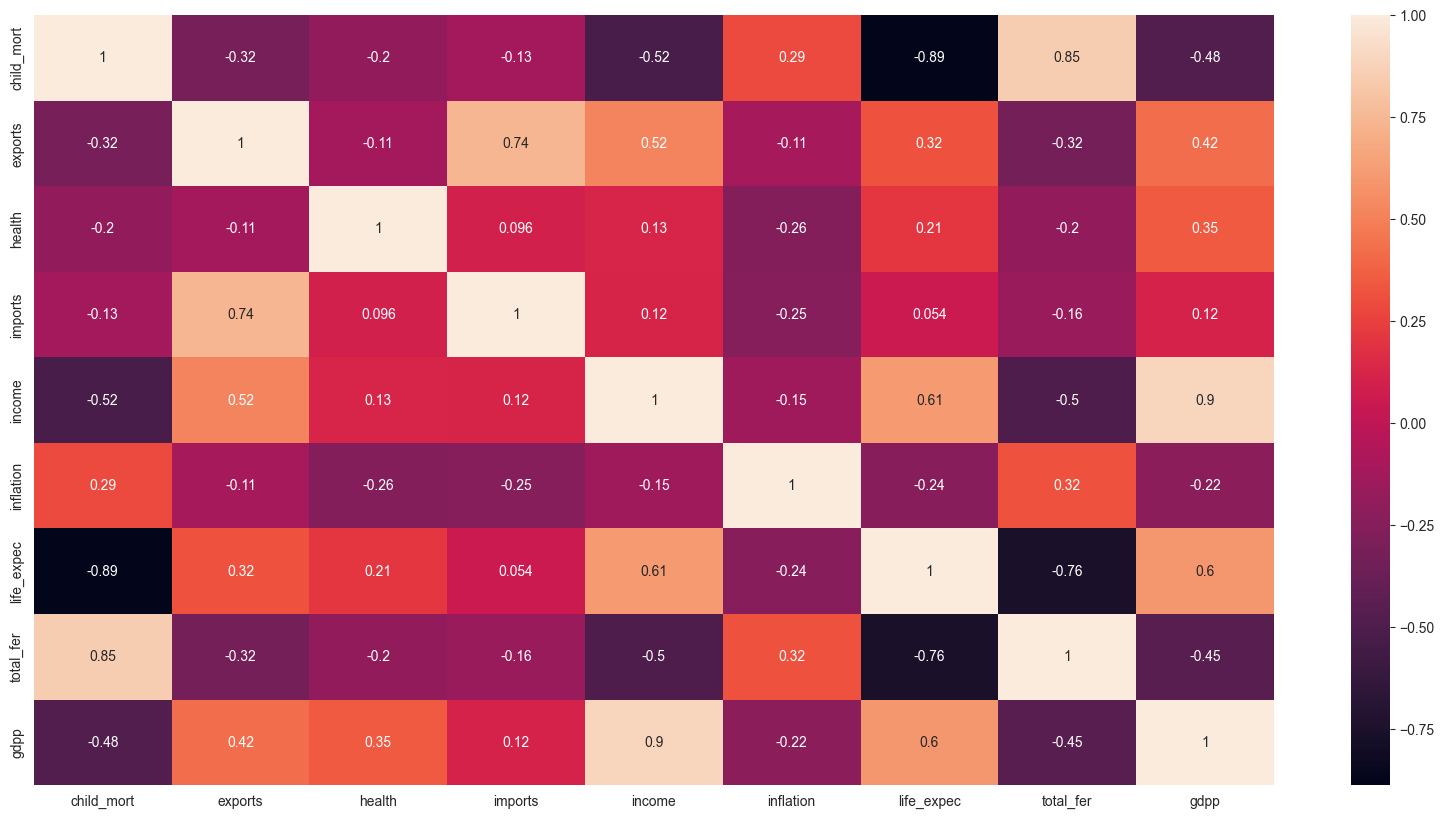

In [26]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize = (20,10))
sns.heatmap(X_scaled_df.corr(),annot = True)

In [27]:
pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)
len(pca.components_)

5

In [28]:
pca.explained_variance_ratio_[0]

0.45951739786095924

<AxesSubplot: >

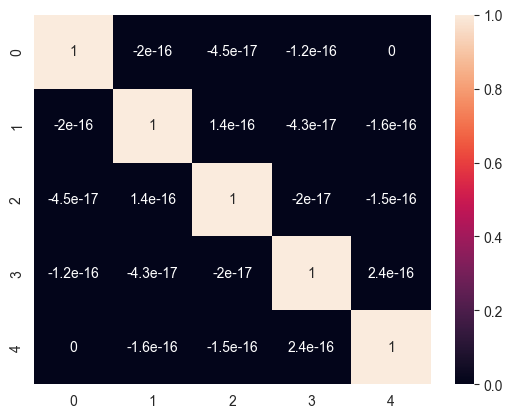

In [29]:
X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

In [30]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(i, silhouette_avg)

D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

2 0.3044199499231817
3 0.3079769786519015
4 0.3235154307362653
5 0.3255806324717655
6 0.2671181792769642
7 0.2256950938124907
8 0.24037703530553403
9 0.27436633921353193
10 0.24031234938202223


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


D:\Work\DST\__environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<AxesSubplot: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

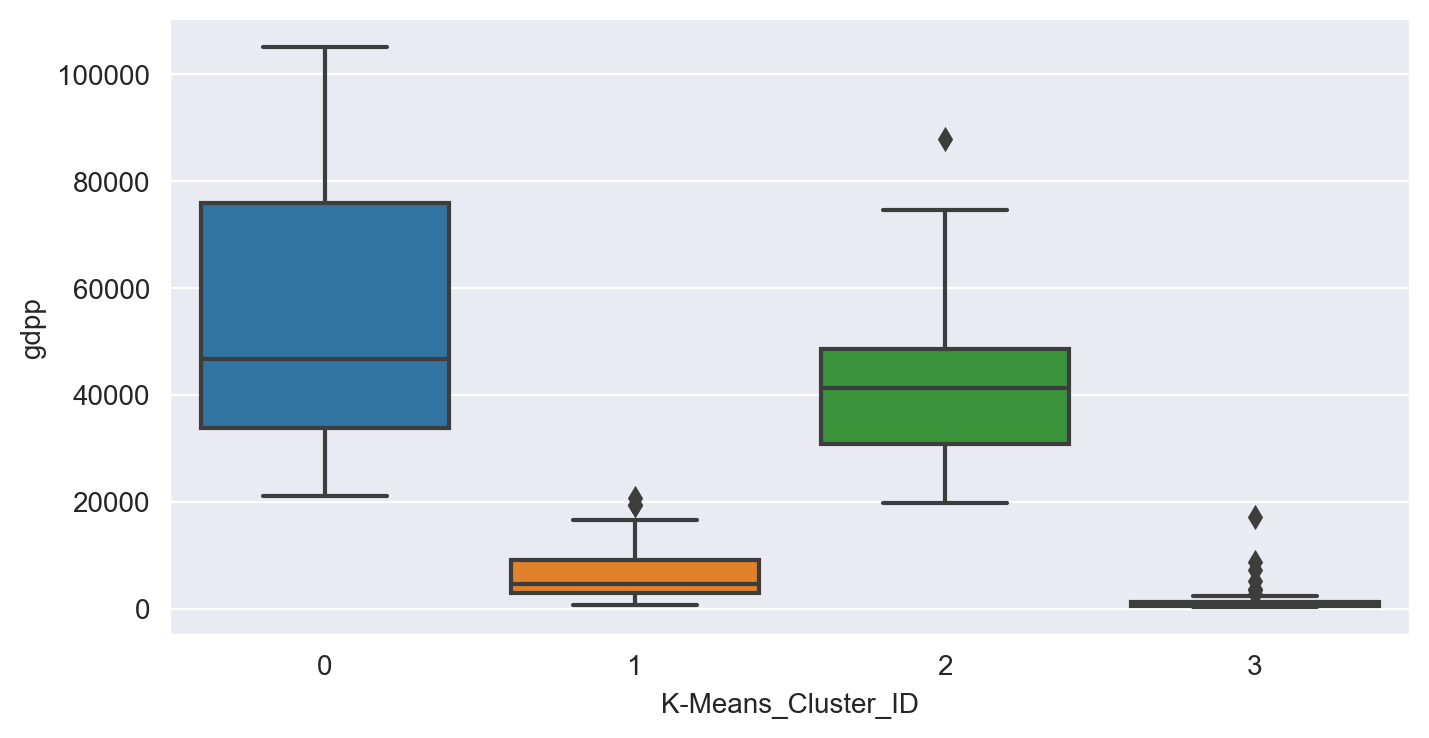

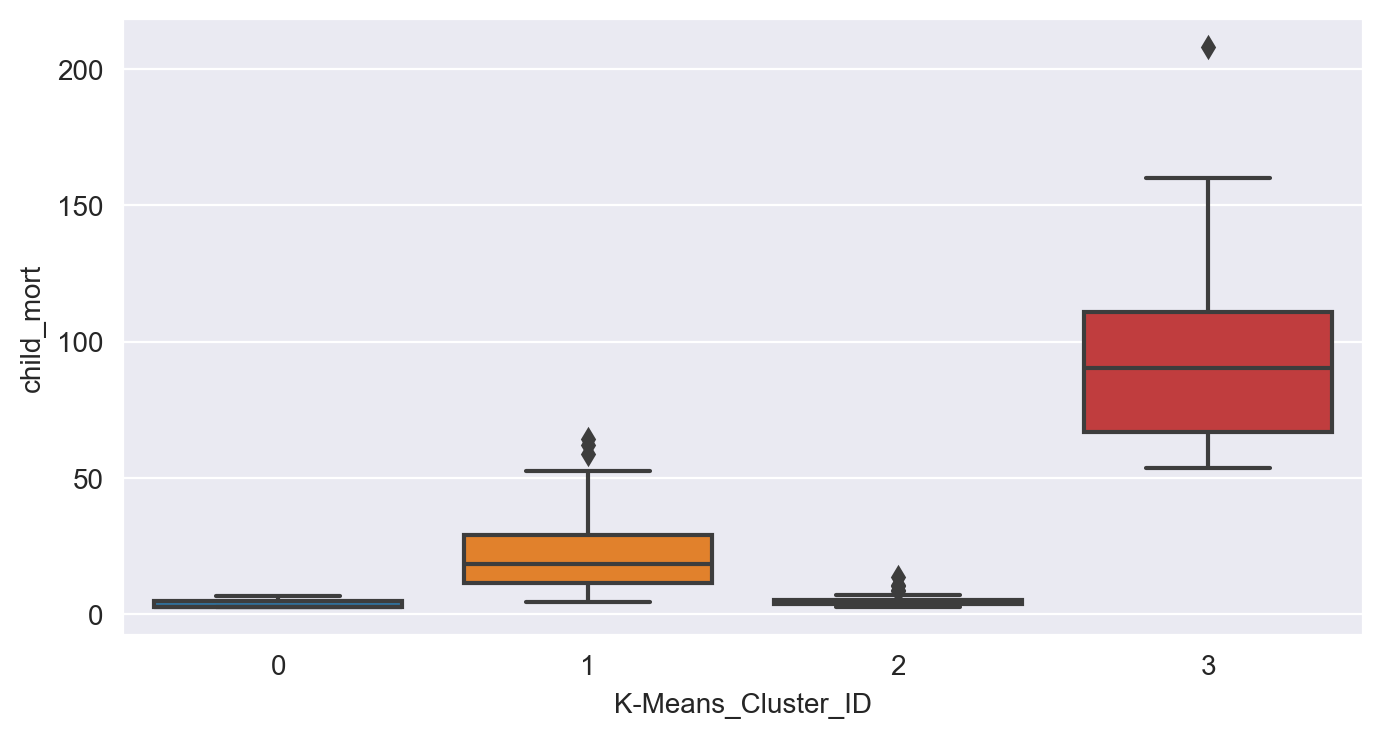

In [31]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_pca)
df['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df)

In [32]:
K_Means_countries = df[df['K-Means_Cluster_ID'] == 1]
K_Means_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970,1
52,Fiji,24.1,57.8,4.86,63.9,7350,4.230,65.3,2.67,3650,1
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,1
...,...,...,...,...,...,...,...,...,...,...,...
119,Peru,20.3,27.8,5.08,23.8,9960,5.710,77.9,2.54,5020,1
153,Turkey,19.1,20.4,6.74,25.5,18000,7.010,78.2,2.15,10700,1
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,1
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,1
